In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'Amazon Sale Data.csv' , encoding = "unicode_escape")
# To avoid encoding error we use unicode_escape

In [3]:
print("No of Row: " , df.shape[0])
print("No of Col: " , df.shape[1])

No of Row:  128976
No of Col:  21


In [4]:
df.head(5) #To check first five row of the dataframe

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [5]:
df.info()  #To check overall informatin about data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [6]:
df.drop_duplicates(inplace= True)

In [7]:
df.drop(['New', 'PendingS', 'fulfilled-by' ] , axis=1, inplace=True) #drop null columns

In [8]:
df.dropna(inplace=True) #Drop row that contain null values.

In [9]:
# Change datatype into intiger.
df[['Amount', 'ship-postal-code']] = df[['Amount', 'ship-postal-code']].astype(int)

In [10]:
# Ensure type is corrently changed.
df[['Amount', 'ship-postal-code']].dtypes

Amount              int32
ship-postal-code    int32
dtype: object

In [11]:
df.isnull().sum()  #To check if null value is remian exists.

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

In [12]:
df.drop('index', axis = 1, inplace = True)  # Removed the index column to eliminate additional indexing in the DataFrame

In [13]:
df['Qty'] = df['Qty'].astype("int32") # change 64 bit to 32 bit.

In [14]:
# rename column
df.rename(columns={'Qty': 'Quantity'} , inplace=True)

In [15]:
df.columns  # check all colnumns name 

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

In [16]:
#rest row index
df.reset_index(drop=True, inplace=True)

In [17]:
df.describe()  # provide an overview of the statistical properties of numerical columns

,Quantity,Amount,ship-postal-code
count,120988.000000,120988.000000,120988.000000
mean,0.961261,648.623830,463633.868888
std,0.214284,281.236083,191322.751791
min,0.000000,0.000000,110001.000000
25%,1.000000,449.000000,382421.000000
50%,1.000000,605.000000,500032.000000
75%,1.000000,788.000000,600021.000000
max,8.000000,5584.000000,989898.000000


*Note: Before proceeding to the Exploratory Data Analysis, ensure that your data has been properly cleaned and is ready for analysis. Verify for any remaining inconsistencies or missing values that might affect the analysis.*


# Exploratory Data Analysis (EDA)

### Size

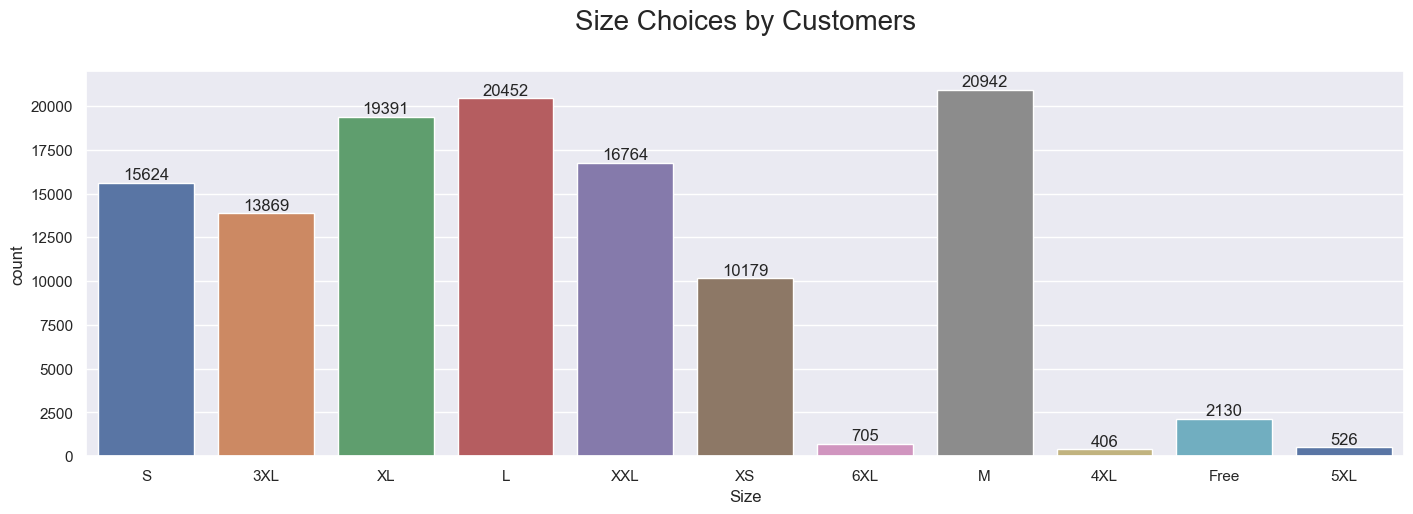

In [18]:
sns.set(rc = {"figure.figsize":(17,5)})
plt.title('Size Choices by Customers',fontsize=20, pad=30)

ax = sns.countplot(x = 'Size' , data = df, palette='deep', legend=False, hue='Size')
for bars in ax.containers:
    ax.bar_label(bars)

In [19]:
size_status = df.groupby(['Size'] , as_index=False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

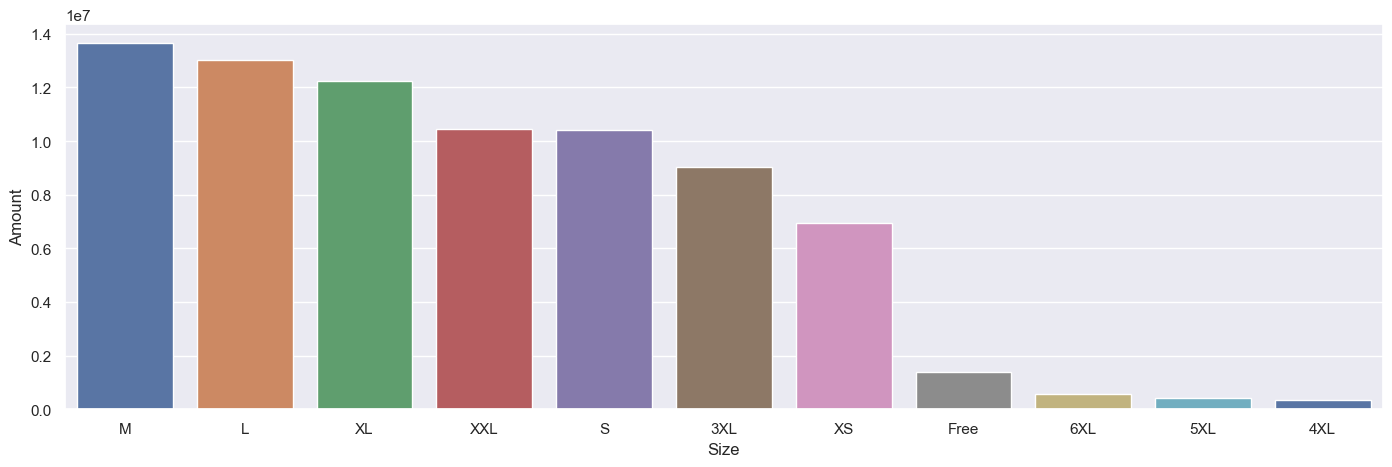

In [20]:
sns.barplot(x = 'Size' , y = 'Amount' , data = size_status, palette='deep', legend=False, hue='Size')
plt.show()

In [21]:
size_status = df.groupby(['Size'] , as_index=False)['Quantity'].sum().sort_values(by = 'Quantity' , ascending = False)

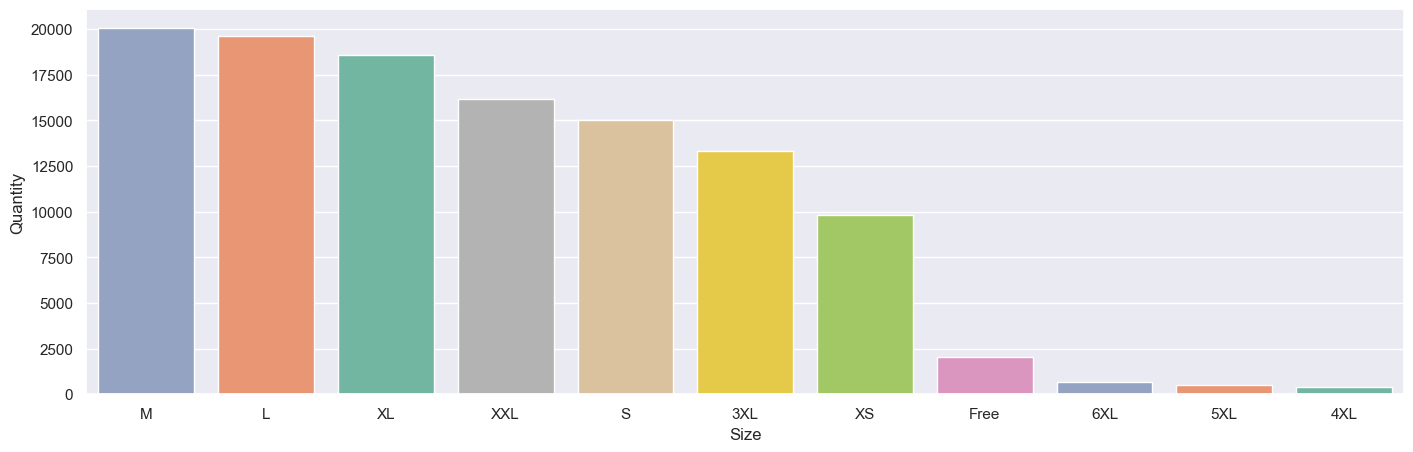

In [22]:
sns.barplot(x='Size' , y = 'Quantity' , data = size_status,  palette='Set2', hue= 'Quantity' , legend=False)
plt.show()

From the above graphs, it's evident that a significant portion of buyers prefer sizes  as Medium, Large, and X-Large, indicating their notable purchasing power

# Category

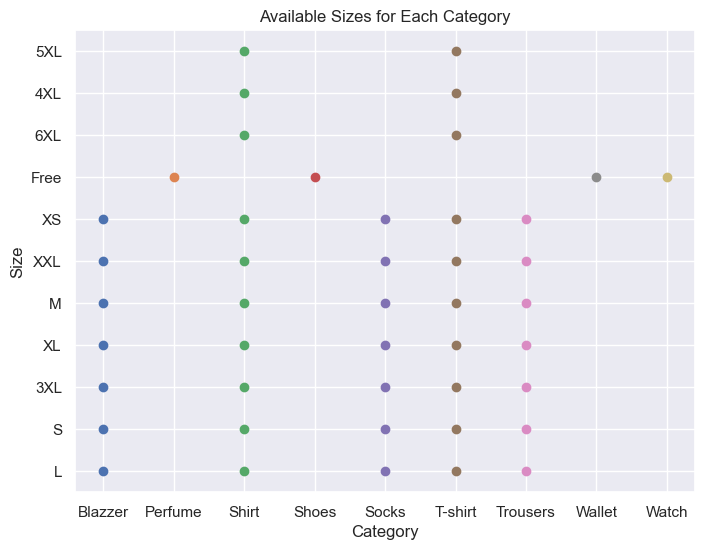

In [23]:
# Grouping data by 'Category' and aggregating 'Size' values
grouped_sizes = df.groupby('Category')['Size'].unique()

# Plotting available sizes for each category
plt.figure(figsize=(8, 6))
for category, sizes in grouped_sizes.items():
    plt.scatter([category] * len(sizes), sizes, label=category)

plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Available Sizes for Each Category')
plt.show()

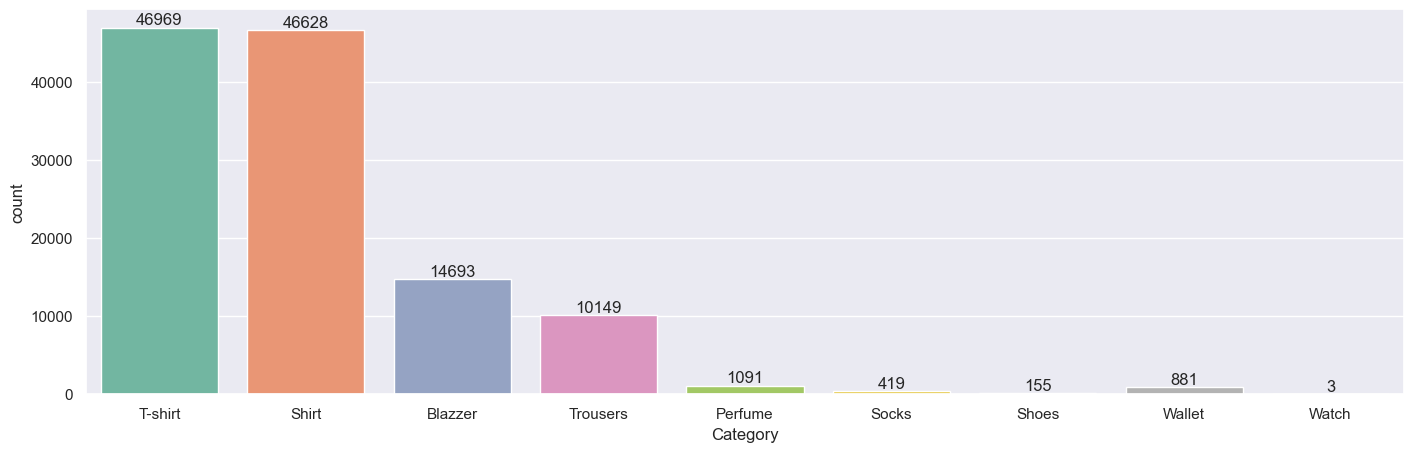

In [24]:
# count category  
ax = sns.countplot(x='Category'  , data= df, palette='Set2', hue='Category',  legend=False)

# Add value on top of the bars
for bars in ax.containers:
    ax.bar_label(bars)

In [25]:
sales_category = df.groupby('Category', as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False)

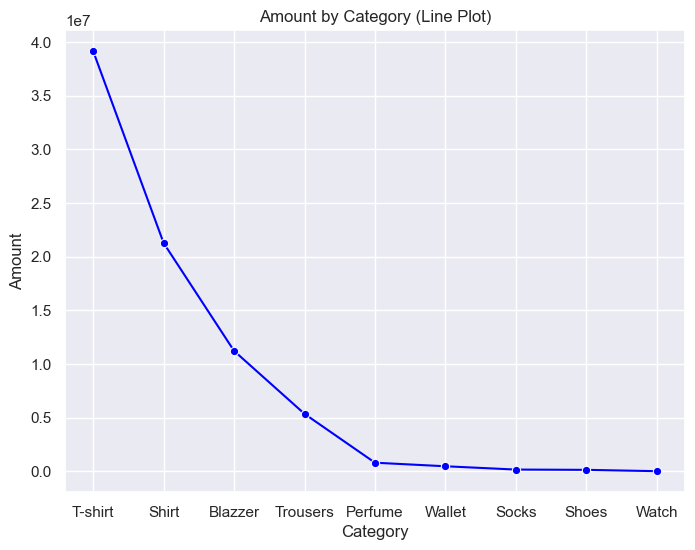

In [26]:
# check which category has highest has purchasing power
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

sns.lineplot(x='Category', y='Amount', data=sales_category, marker='o', color='blue')
plt.xlabel('Category')  # Set the x-axis label
plt.ylabel('Amount')    # Set the y-axis label
plt.title('Amount by Category (Line Plot)')  # Set the title of the plot

plt.show()

In [27]:
sales_category = df.groupby('Category', as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(4)

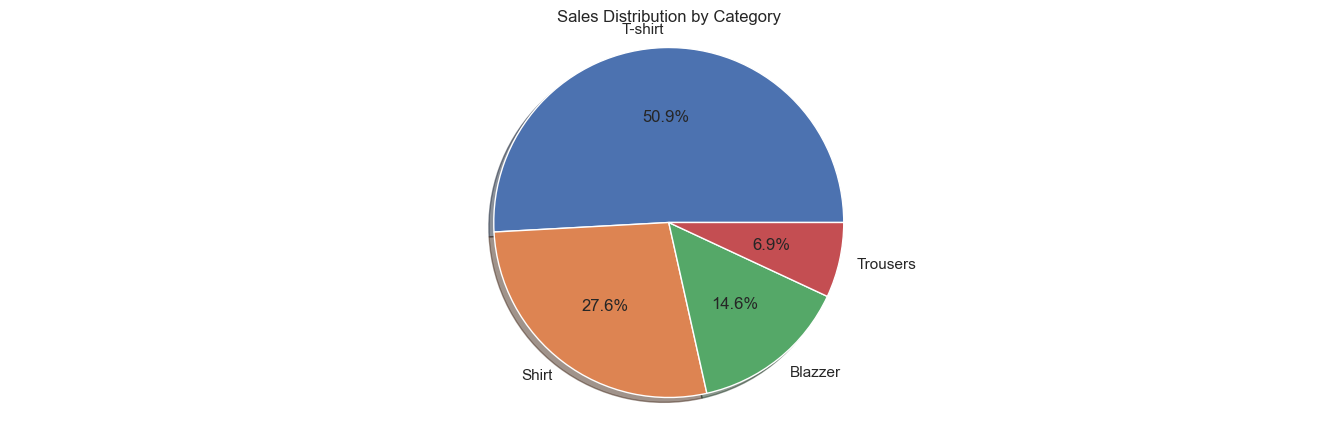

In [28]:
# pie chart with top 4 most sales category.
plt.pie(sales_category['Amount'], labels=sales_category['Category'], shadow=True , autopct='%1.1f%%')
plt.axis('equal')
plt.title('Sales Distribution by Category')  # Set the title of the pie chart
plt.show()

*The countplot shows lots of buys for T-shirts, shirts, blazers, and trousers, and they bring in a lot of money, proving they're really popular and make a big impact on sales*

# destination city

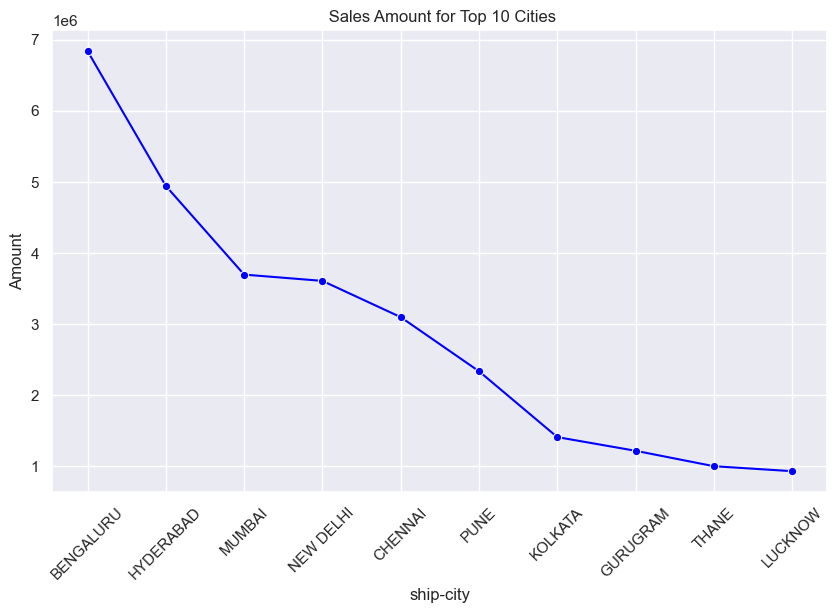

In [29]:
# Get the top 10 cities by sales
city_sales = df.groupby('ship-city', as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False ).head(10)

plt.figure(figsize=(10, 6))
sns.lineplot(x='ship-city', y='Amount', data = city_sales, marker='o', color = 'blue')
plt.xticks(rotation=45)
plt.title(' Sales Amount for Top 10 Cities')
plt.show()


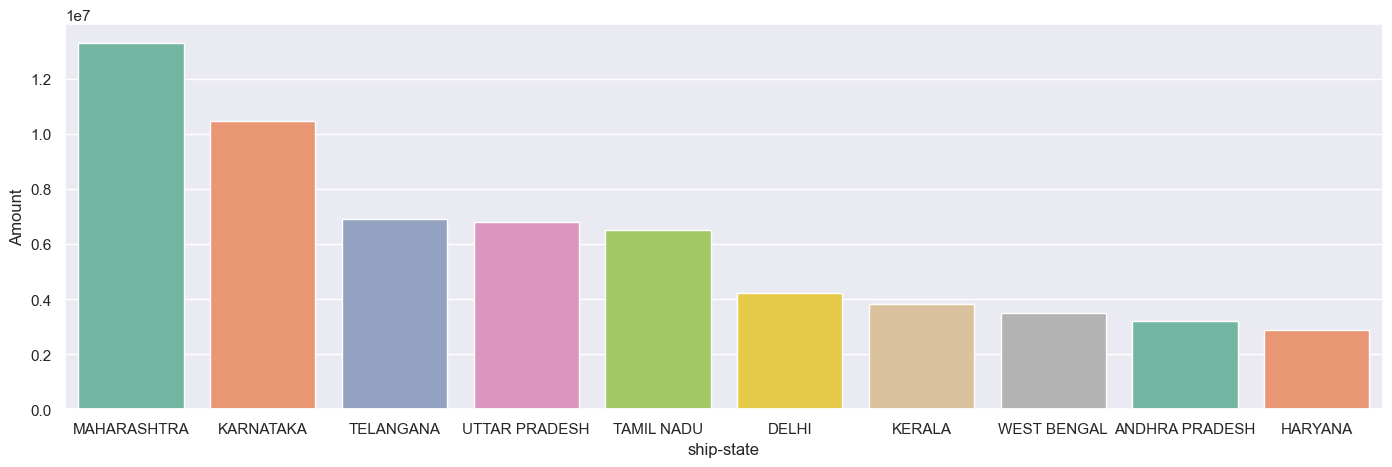

In [30]:
sales_state = df.groupby('ship-state' , as_index = False)['Amount'].sum().sort_values(by='Amount' , ascending= False).head(10)
sns.barplot(x = 'ship-state' , y = 'Amount' , data = sales_state , palette='Set2', hue='ship-state',  legend=False )
plt.show()

*The analysis reveals Maharashtra and Karnataka as leading states, with Bengaluru, Hyderabad, and Mumbai shining as top cities. These insights are crucial for strategic business decisions and growth strategies.*

# check B2B buyer 

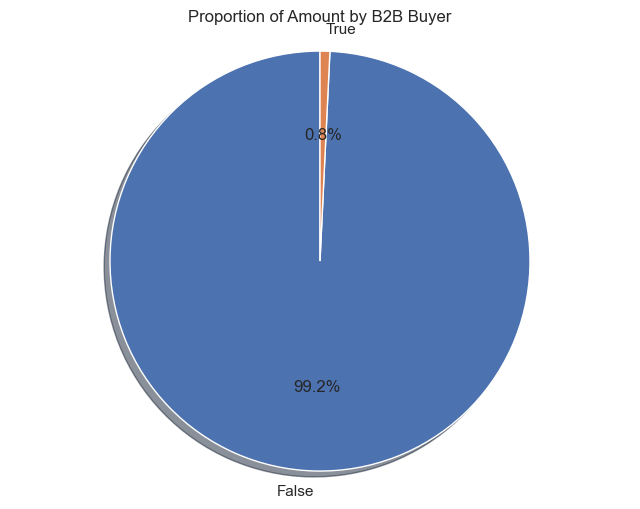

In [31]:
total_amount_by_B2B = df.groupby('B2B', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Extracting B2B labels and corresponding amounts for pie chart
b2b_labels = total_amount_by_B2B['B2B'].tolist()
b2b_amounts = total_amount_by_B2B['Amount'].tolist()

# Creating a pie chart
plt.figure(figsize=(8, 6))
plt.pie(b2b_amounts, labels=b2b_labels, shadow=True,  autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Amount by B2B Buyer')
plt.show()


*Only 0.8% of buyers are engaged in business-to-business transactions based on the analyzed data*

# Status

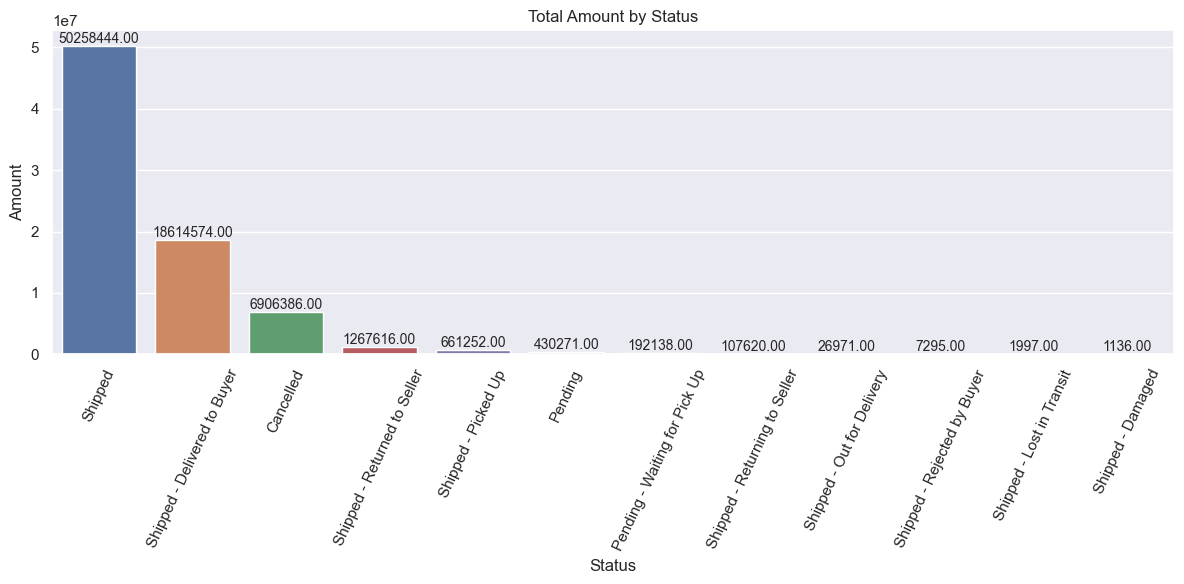

In [32]:
status_Amount = df.groupby('Status', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(12, 6))  # Set the size of the plot

# Creating the bar plot
ax = sns.barplot(x='Status', y='Amount', data=status_Amount, palette='deep', hue='Status', dodge=False)

# # Increasing the size of the values on bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), 
                textcoords='offset points', fontsize=10)  
    
plt.xticks(rotation=65)
plt.title('Total Amount by Status')
plt.tight_layout()  # Adjusts plot layout to prevent clipping of labels
plt.show()


*The graph highlights a predominant number of orders marked as 'Shipped', yet it also reveals a significant count of orders categorized as 'Cancelled*

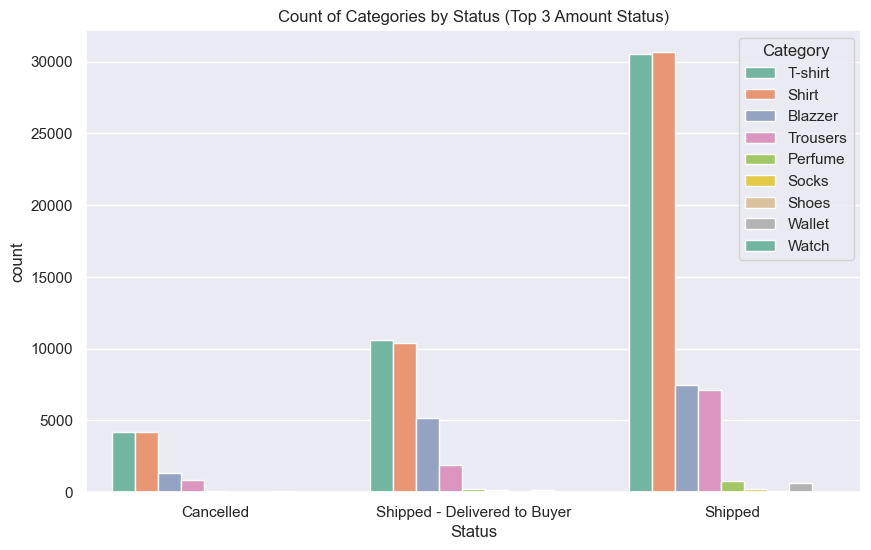

In [33]:
# checking catagory status on first three amount status

top_3_statuses = df['Status'].value_counts().head(3).index.tolist()
filtered_df = df[df['Status'].isin(top_3_statuses)]

plt.figure(figsize=(10, 6))  # Set the size of the plot

# Creating the count plot for top three amount statuses
sns.countplot(x='Status', hue='Category', data=filtered_df, palette='Set2')

plt.title('Count of Categories by Status (Top 3 Amount Status)')
plt.legend(title='Category')
plt.show()


*The ratio of canceled orders for shirts and T-shirts, in comparison to shipped orders, is considerably lower, signifying a higher success rate in these categories*

# Conclusion 

*The data emphasizes strong preferences for Medium, Large, and X-Large sizes and highlights T-shirts, shirts, blazers, and trousers as high-selling categories. Maharashtra, Karnataka, Bengaluru, Hyderabad, and Mumbai shine as top-performing regions. B2B engagement is minimal at 0.8%, while 'Shipped' orders dominate with notable 'Cancelled' orders, especially with shirts and T-shirts showing lower cancellation rates, suggesting better success in these categories*